In [4]:
from data_formats import read_data
from dose_reponse_fit import dose_response_fit, StandardSettings
import matplotlib.pyplot as plt
from plotting import *
from stress_survival_conversion import stress_to_survival, survival_to_stress
import random
import glob
from tqdm import tqdm

In [8]:
path = "data/naeem_Esfenvalerate_2019.xlsx"

data  = read_data(path)

settings = StandardSettings(survival_max=data.meta.max_survival)

main_fit = dose_response_fit(data.main_series, settings)

stressor = random.choice(list(data.additional_stress.keys()))

stress_fit = dose_response_fit(data.additional_stress[stressor], settings)

In [11]:
x1 = main_fit.survival_curve
x2 = np.ones_like(x1) * stress_fit.optim_param["d"]

x = np.stack((x1, x2), axis=1)

y = stress_fit.survival_curve

x.shape

(10000, 2)

In [20]:
from autora.theorist.darts import DARTSRegressor

primitives = [
    "none",
    "add",
    "subtract",
    'mult',
    "logistic",
    'exp',
    'relu',
]

darts_estimator = DARTSRegressor(
    num_graph_nodes=3,
    arch_updates_per_epoch=1,
    arch_learning_rate_max=0.001,
    param_updates_per_epoch=500,
    param_momentum=0.9,
    max_epochs=10,
    output_type="real",
    primitives=primitives,
)

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:35<00:00,  3.53s/it]


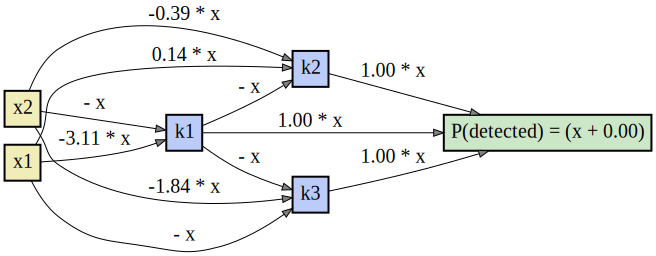

In [21]:
darts_estimator.fit(x, y)
darts_estimator.visualize_model()

In [17]:
x

array([[0.93330395, 0.88888889],
       [0.93330392, 0.88888889],
       [0.93330388, 0.88888889],
       ...,
       [0.07860583, 0.88888889],
       [0.07844254, 0.88888889],
       [0.07827949, 0.88888889]])

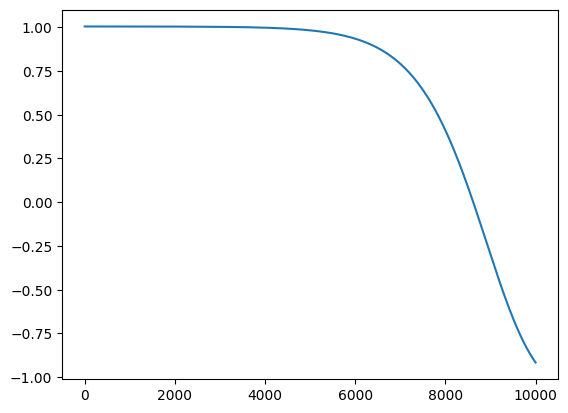

In [23]:
plt.plot(darts_estimator.predict(x))